In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib widget

In [2]:
# Custom colors for charts

c_0 = np.array([40, 40, 95,256])/256
c_1 = np.array([85, 190, 155,256])/256

# Creating a custom colormap
# The code comes from https://matplotlib.org/3.1.1/tutorials/colors/colormap-manipulation.html
from matplotlib.colors import ListedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(c_0[0], c_1[0], N)
vals[:, 1] = np.linspace(c_0[1], c_1[1], N)
vals[:, 2] = np.linspace(c_0[2], c_1[2], N)
custom_cmp1 = ListedColormap(vals)

# A colormap with white in the middle
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.concatenate((np.linspace(c_0[0], 1, 128), np.linspace(1, c_1[0], 128)), axis = None)
vals[:, 1] = np.concatenate((np.linspace(c_0[1], 1, 128), np.linspace(1, c_1[1], 128)), axis = None)
vals[:, 2] = np.concatenate((np.linspace(c_0[2], 1, 128), np.linspace(1, c_1[2], 128)), axis = None)
custom_cmp2 = ListedColormap(vals)

# Allow value-dependant colorbar

def color_bar(y, cmap=custom_cmp1):
    
    # Create the matrix for colors
    color_list = []
    # Normalise the values
    y = (y-min(y))/(max(y)-min(y))
    
    for i in range(len(y)):
        color_list.append(cmap(int(N*y[i])))
    
    return color_list

In [3]:
# PCA scrre plot function
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.bar(np.arange(len(scree))+1, scree, color = c_0)
    ax.plot(np.arange(len(scree))+1, scree.cumsum(),c=c_1,marker='o')
    ax.set_xlabel("Component")
    ax.set_ylabel("Inertia (%)")
    ax.set_title("Scree plot")
    plt.show(block=False)

In [44]:
def pca_circle(pca, pc_couples, labels):
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot()
    
    for i in range(X_scaled.shape[1]):
        for couple in pc_couples:
            cor_pc1 = pca.components_[couple[0], i]
            cor_pc2 = pca.components_[couple[1], i]
            
            ax.arrow(0,0,
                     cor_pc1,
                     cor_pc2,
                     color = c_1,
                     width = 0.01,
                     head_width = 0.08,
                     length_includes_head = True)
            
            ax.text(cor_pc1 + 0.1,
                    cor_pc2 + 0.1,
                    labels[i],
                    fontsize='14',
                    ha='center',
                    va='center',
                    color=c_1)
            ax.set_xlabel(f"Componant {couple[0]+1}")
            ax.set_ylabel(f"Componant {couple[1]+1}")
    
    # draw the circle and h and v lines
    circle = Circle((0,0), 1, facecolor='none', edgecolor=c_0, linewidth=1, alpha=1)
    ax.add_patch(circle)
    ax.hlines(0, -1, 1, color = c_0, linestyles = "dashed")
    ax.vlines(0, -1, 1, color = c_0, linestyles = "dashed")
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    plt.show()
    

In [6]:
df = pd.read_csv("Y. Zhang et al..csv", delimiter = "\t")

In [7]:
df.head()

,Index,Polymer,Θ (Debye Ang),Φ (Debye Ang3),Tg (K),QSPR,SVR,M1,CV Fold,M2. CV Fi,M2
0,1,Polyethylene,0.6776,−50.0178,195,221,222,195.0366,CV F3,234.2390,198.9571
1,2,Poly (vinyl acetate),7.7949,−324.9730,301,324,321,301.0246,CV F1,325.0341,303.4257
2,3,Poly (vinyl butyral),7.3902,−889.1739,324,305,306,323.9881,CV F3,315.2997,323.1181
3,4,Poly (vinylidene fluoride),3.8068,−98.8344,233,268,265,233.0538,CV F5,273.9645,237.1441
4,5,Poly (vinylidene chloride),5.0194,−223.2520,256,283,281,256.0370,CV F6,291.9063,259.6241


In [8]:
X = df.loc[:,["Θ (Debye Ang)", "Φ (Debye Ang3)", "QSPR"]]
X.loc[:, "Φ (Debye Ang3)"] = df["Φ (Debye Ang3)"].str.replace('−', '-').astype('float64')
X_scaled = StandardScaler().fit_transform(X)

Y = df.loc[:,["Tg (K)"]]

C:\Users\alfre\AppData\Local\Temp\ipykernel_8216\3841859710.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, "Φ (Debye Ang3)"] = df["Φ (Debye Ang3)"].str.replace('−', '-').astype('float64')


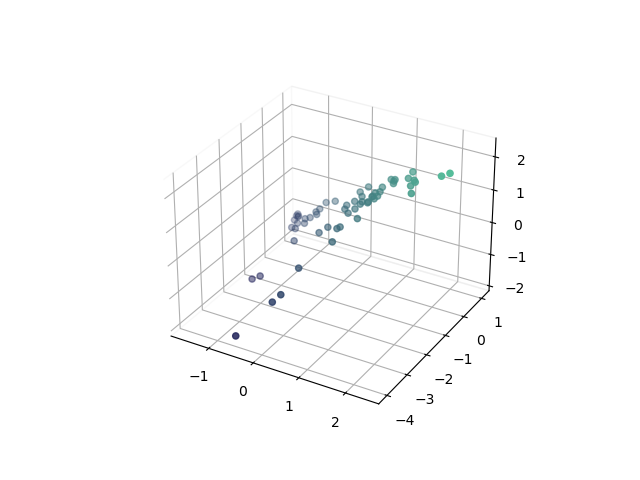

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_scaled[:,0],
           X_scaled[:,1],
           X_scaled[:,2], c = X_scaled[:,2], cmap = custom_cmp1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()

In [10]:
pca = PCA()
pca.fit(X_scaled)

PCA()

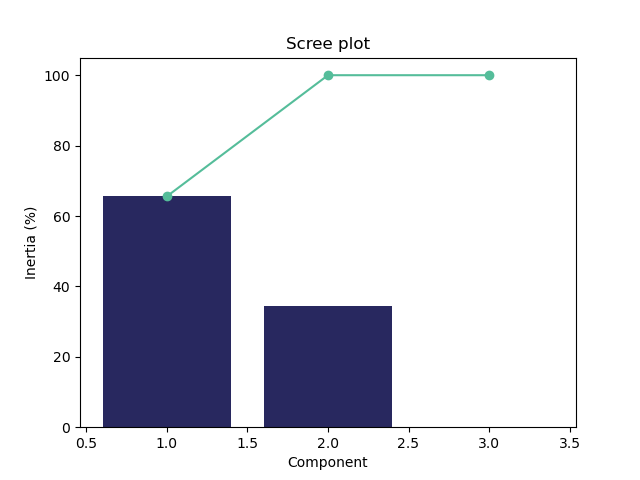

In [11]:
display_scree_plot(pca)

In [12]:
X_tr = pca.transform(X_scaled)

In [13]:
pca.components_[0]

array([0.69023138, 0.13161231, 0.71151869])

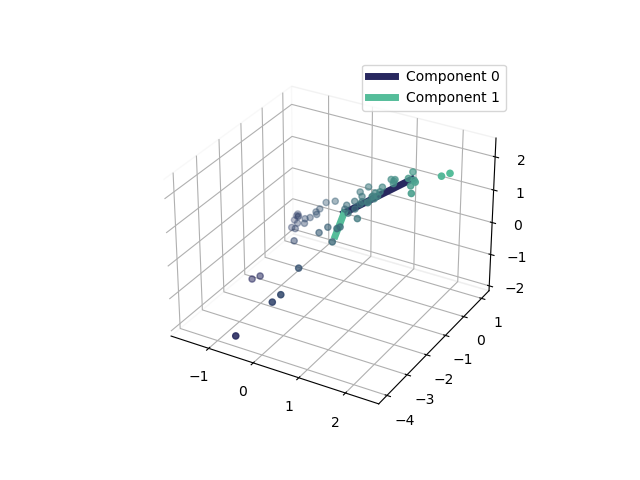

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_scaled[:,0],
           X_scaled[:,1],
           X_scaled[:,2], c = X_scaled[:,2], cmap = custom_cmp1)

for i, (comp, var) in enumerate(zip(pca.components_[0:2,:], pca.explained_variance_[0:2])):
    comp = comp * var  # scale component by its variance explanation power
    ax.plot([0,comp[0]],
            [0,comp[1]],
            [0,comp[2]],
            label=f"Component {i}",
            linewidth=5,
            color = [c_0, c_1, 'r'][i])
ax.legend()


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()

In [15]:
pca.explained_variance_

array([2.00139092e+00, 1.04944794e+00, 8.59427448e-06])

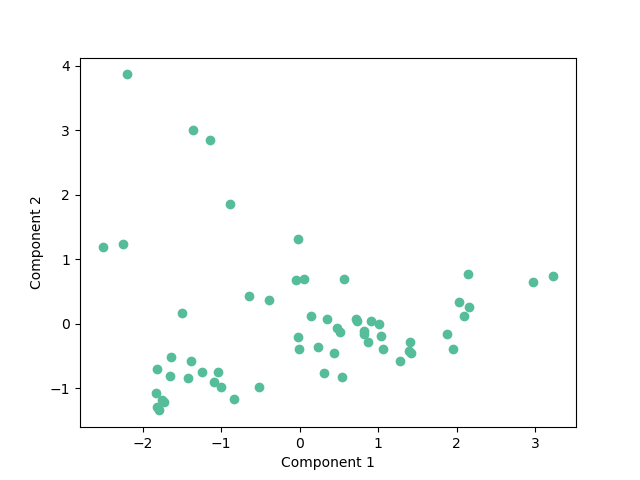

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_tr[:,0], X_tr[:,1], color = c_1)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

plt.show()

In [17]:
from functions import display_circles

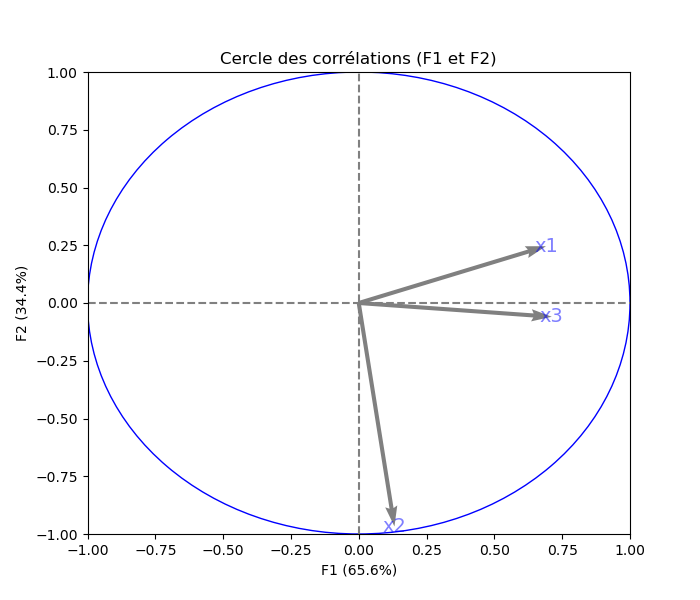

In [18]:
display_circles(pca.components_, 2, pca, [(0,1)], labels = ["x1", "x2", "x3"])

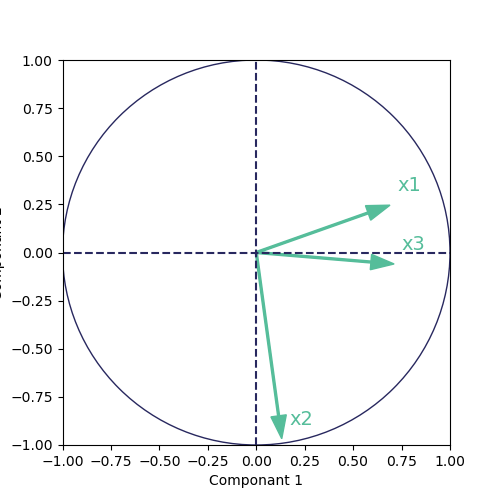

In [45]:
pca_circle(pca, [(0, 1)], ["x1", "x2", "x3"])

In [20]:
df_milk = pd.read_csv("milk.csv")

In [21]:
df_milk.head()

,Unnamed: 0,labels,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,602
0,1/02/2018,1,2.397526,2.394200,2.388952,2.381282,2.371906,2.360940,2.349092,2.336749,...,0.109473,0.111015,0.113123,0.115745,0.118939,0.122773,0.127250,0.132313,0.137997,0.144151
1,1/02/2018.1,1,2.399526,2.396723,2.391678,2.383280,2.372825,2.361160,2.348541,2.336346,...,0.108937,0.110649,0.112845,0.115586,0.118847,0.122642,0.127013,0.131837,0.137191,0.143028
2,1/02/2018.2,1,2.396475,2.393600,2.388446,2.380985,2.371319,2.359930,2.348114,2.336348,...,0.108358,0.110062,0.112391,0.115298,0.118736,0.122774,0.127359,0.132500,0.138217,0.144524
3,1/02/2018.3,1,2.406880,2.404243,2.399203,2.391142,2.380536,2.368569,2.356339,2.344046,...,0.110105,0.111836,0.114057,0.116744,0.119888,0.123524,0.127728,0.132561,0.138030,0.144085
4,1/02/2018.4,1,2.409883,2.407017,2.401310,2.392669,2.381365,2.368603,2.355518,2.342792,...,0.110129,0.111469,0.113277,0.115589,0.118503,0.122092,0.126346,0.131227,0.136840,0.143176


In [22]:
from scipy.stats import pearsonr
